
  Interpolation No. 1 done...

  Interpolation No. 2 done...

  Interpolation No. 3 done...


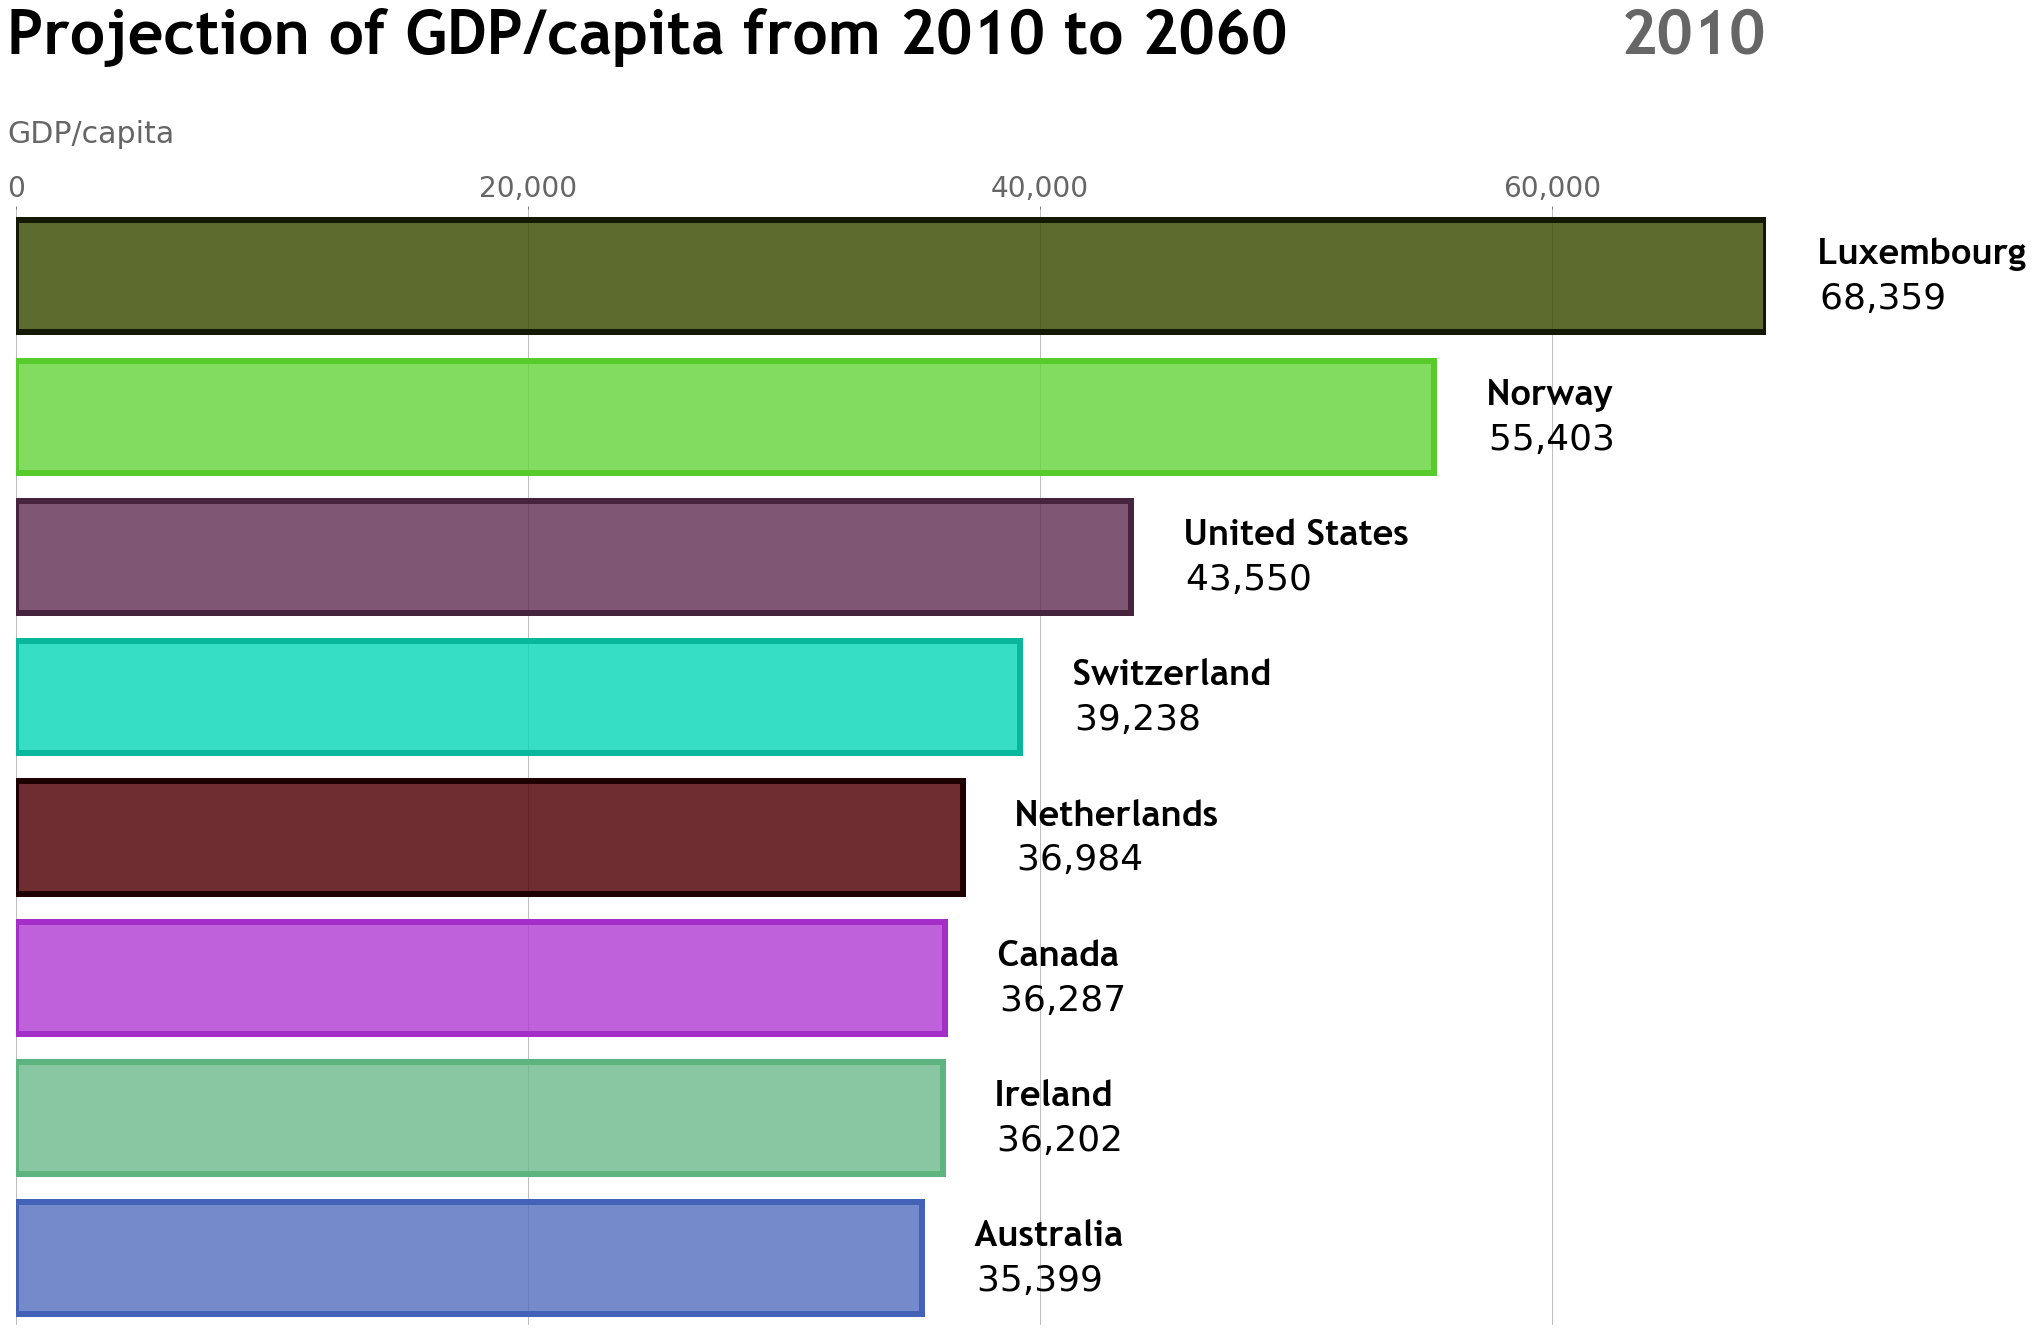

In [10]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.animation as animation
import matplotlib.colors as mc
import colorsys
from random import randint
import re
plt.rcParams['animation.ffmpeg_path'] = 'C:\\Users\\admin\\Downloads\\ffmpeg-20191226-b0d0d7e-win64-static\\bin\\ffmpeg.exe'

df = pd.read_csv(r"C:\Users\admin\Desktop\EO95_LTB_07012019070138125.csv")
df = df.loc[df['Variable'] == 'GDP per capita in USA 2005 PPPs']
df = df[((df.Country != 'OECD - Total') & ( df.Country != 'Non-OECD Economies') & (df.Country != 'World') & (df.Country != 'Euro area (15 countries)'))]
df = df[['Country', 'Time', 'Value']]

df = df.pivot(index = 'Country', columns = 'Time', values = 'Value')
df = df.reset_index()

for p in range(3):
    i = 0
    while i < len(df.columns):
        try:
            a = np.array(df.iloc[:, i + 1])
            b = np.array(df.iloc[:, i + 2])
            c = (a + b) / 2
            df.insert(i+2, str(df.iloc[:, i + 1].name) + '^' + str(len(df.columns)), c)
        except:
            print(f"\n  Interpolation No. {p + 1} done...")
        i += 2

df = pd.melt(df, id_vars = 'Country', var_name = 'Time')

frames_list = df["Time"].unique().tolist()
for i in range(10):
    frames_list.append(df['Time'].iloc[-1])

def transform_color(color, amount = 0.5):

    try:
        c = mc.cnames[color]
    except:
        c = color
        c = colorsys.rgb_to_hls(*mc.to_rgb(c))
    return colorsys.hls_to_rgb(c[0], 1 - amount * (1 - c[1]), c[2])

all_names = df['Country'].unique().tolist()
random_hex_colors = []
for i in range(len(all_names)):
    random_hex_colors.append('#' + '%06X' % randint(0, 0xFFFFFF))

rgb_colors = [transform_color(i, 1) for i in random_hex_colors]
rgb_colors_opacity = [rgb_colors[x] + (0.825,) for x in range(len(rgb_colors))]
rgb_colors_dark = [transform_color(i, 1.12) for i in random_hex_colors]

fig, ax = plt.subplots(figsize = (36, 20))

num_of_elements = 8

def draw_barchart(Time):

    df_frame = df[df['Time'].eq(Time)].sort_values(by = 'value', ascending = True).tail(num_of_elements)
    ax.clear()

    normal_colors = dict(zip(df['Country'].unique(), rgb_colors_opacity))
    dark_colors = dict(zip(df['Country'].unique(), rgb_colors_dark))
    
    ax.barh(df_frame['Country'], df_frame['value'], color = [normal_colors[x] for x in df_frame['Country']], height = 0.8,
            edgecolor =([dark_colors[x] for x in df_frame['Country']]), linewidth = '6')

    dx = float(df_frame['value'].max()) / 200

    for i, (value, name) in enumerate(zip(df_frame['value'], df_frame['Country'])):
        ax.text(value + dx, i + (num_of_elements / 50), '    ' + name,
        size = 36, weight = 'bold', ha = 'left', va = 'center', fontdict = {'fontname': 'Trebuchet MS'})
        ax.text(value + dx, i - (num_of_elements / 50), f'    {value:,.0f}', size = 36, ha = 'left', va = 'center')

    time_unit_displayed = re.sub(r'\^(.*)', r'', str(Time))
    ax.text(1.0, 1.14, time_unit_displayed, transform = ax.transAxes, color = '#666666',
            size = 62, ha = 'right', weight = 'bold', fontdict = {'fontname': 'Trebuchet MS'})
    ax.text(-0.005, 1.06, 'GDP/capita', transform = ax.transAxes, size = 30, color = '#666666')
    ax.text(-0.005, 1.14, 'Projection of GDP/capita from 2010 to 2060', transform = ax.transAxes,
            size = 62, weight = 'bold', ha = 'left', fontdict = {'fontname': 'Trebuchet MS'})

    ax.xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
    ax.xaxis.set_ticks_position('top')
    ax.tick_params(axis = 'x', colors = '#666666', labelsize = 28)
    ax.set_yticks([])
    ax.set_axisbelow(True)
    ax.margins(0, 0.01)
    ax.grid(which = 'major', axis = 'x', linestyle = '-')

    plt.locator_params(axis = 'x', nbins = 4)
    plt.box(False)
    plt.subplots_adjust(left = 0.075, right = 0.75, top = 0.825, bottom = 0.05, wspace = 0.2, hspace = 0.2)

animator = animation.FuncAnimation(fig, draw_barchart, frames = frames_list)
#animator.save("Racing Bar Chart.mp4", fps = 20, bitrate = 1800)

In [4]:
mywriter = animation.FFMpegWriter(fps=30)
animator.save('mymovie.mp4',writer=mywriter)

FileNotFoundError: [WinError 2] The system cannot find the file specified